In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Contents

* [<font size=4>Getting Started</font>](#1)
    * [Importing the Libraries](#1.1)
    * [Importing and Inspecting the Data](#1.2)
   
   
* [<font size=4>Fitting the model</font>](#2)
    * [Setting up the input and the output variable](#2.1)
    * [Fitting The logisitc Regression Model](#2.2)
    * [Evaluating the Model](#2.3)

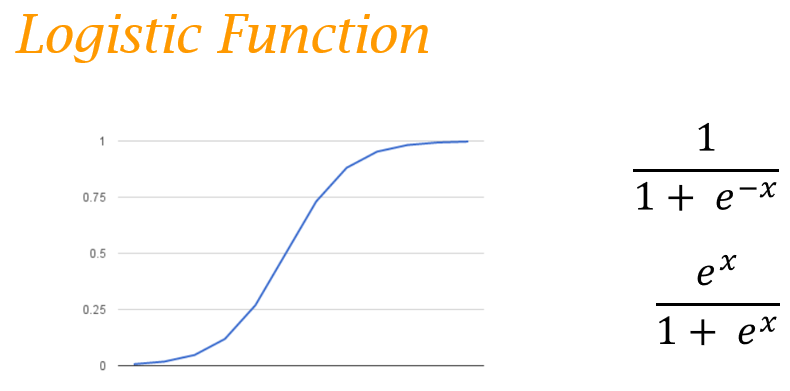

# Getting Started <a id="1"></a>
Here we describe importing the library, impoting the datset and some basic checks on the dataset

# Importing the Libraries <a id="1.1"></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 

# Importing and Inspecting the Data

In [ ]:
df=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
print(df.shape)
df.head(5)

# Fitting the model <a id="2"></a>
In this section we first set up the input and output variable.   Build Logistic Regression model, play around with diffrent values of the probability

# Setting up the input and output variable <a id="2.1"></a>

In [ ]:
# Selecting from Third to Thirty Second Column
X= df.iloc[:,2:32]
# Selecting second Columnn
y=df.iloc[:,1]

# Fitting the logistic regression model <a id=2.2></a>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression(max_iter=5000)
logmodel.fit(X_train, y_train)

# Important Parameters

* solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
* max_iterint, default=100 
* multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
* penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’

# Evaluating logistic regression model <a id=2.3></a>

In [ ]:
from sklearn.metrics import accuracy_score
nc=np.arange(0.1,0.9,0.1)
acc=np.empty(8)
i=0
for k in np.nditer(nc):
    y_predp = (logmodel.predict_proba(X_test)[:,1] >= k).astype(bool)
    y_pred=np.full(y_pred.size,'B')
    y_pred[y_predp]='M'
    acc[i]=accuracy_score(y_test, y_pred)
    i = i + 1
acc

In [ ]:
x=pd.Series(acc,index=nc)
x.plot()
# Add title and axis names
plt.title('Class 1 Probability vs Accuracy')
plt.xlabel('Class 1 Probability')
plt.ylabel('Accuracy')
plt.show() 

# Good Read for Classfier Comparison

Classifier comparison
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

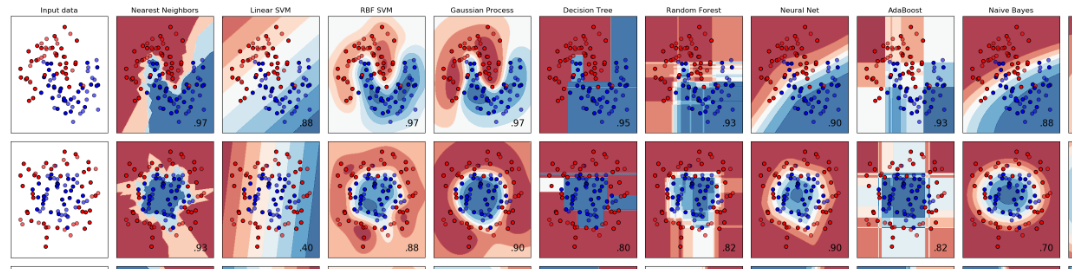